# Lab 1: Image recognition
You will find the complete lab manual in this file. Some exercises require written answers, while others require coding.

**Important:** Do **not** define functions directly in this notebook. Instead, save them in the `functions.py` file and call them from the code cells in this notebook.

### Submission Requirements:
Your final lab submission should include:
1. Your edited **notebook file** (`.ipynb`).
2. Your **`functions.py`** file containing all function definitions.
3. A **HTML printout** of the executed notebook with all outputs visible: File → Save and export Notebook As → HTML

First, we'll import a set of python packages you'll need for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob

## Task 1: Blood cell classification with a mean template classifier

Load `data/bloodcell.npz`, which is a set of patches containing blood cells.

In [2]:
data = np.load('data/bloodcells/training_data.npz', allow_pickle=True)
pos_patches = data['fg_patches'] # positive examples
neg_patches = data['bg_patches'] # negative examples
nbr_pos = len(pos_patches) # number of positive patches
nbr_neg = len(neg_patches) # number of negative patches
print(f'Number of samples: {nbr_pos+nbr_neg}')

Number of samples: 400


### Task 1.1
Display some positive and negative examples. Based on the displayed examples, how do you think the positive and negative examples were selected?

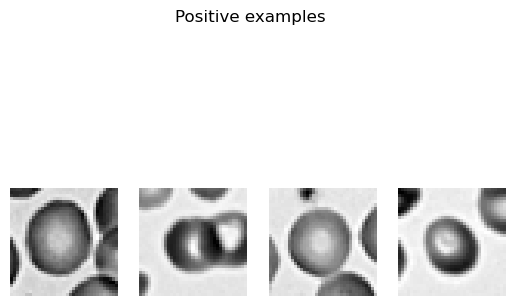

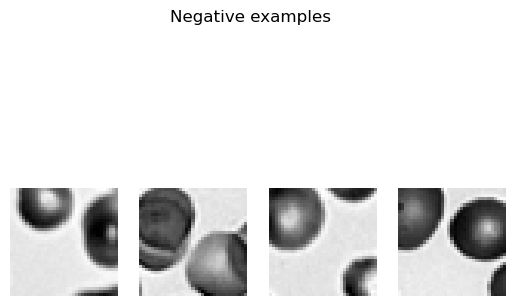

In [3]:
# Your code here

# Select random positive and negative examples
random_pos_patches = np.random.choice(pos_patches,4,replace=False)
random_neg_patches = np.random.choice(neg_patches,4,replace=False)

# Display randomly selected positive examples
f, ax = plt.subplots(1,4)
for i,image in enumerate(random_pos_patches): 
    ax[i].imshow(image / 255, cmap='gray')
    ax[i].axis('off')
plt.suptitle('Positive examples')
# Display randomly selected negative examples    
f, ax = plt.subplots(1,4)
for i,image in enumerate(random_neg_patches):
    ax[i].imshow(image / 255, cmap='gray')
    ax[i].axis('off')
plt.suptitle('Negative examples')
plt.show()

**Comment:**
Upon visual inspection, the patches containing blood cells were selected as positive examples when containing a circular shape high-intensity region in the center. Probably, the patches were compared to an average patch with a central bloob, a circular shape high-intensity region, centered in the center of the patch.

### Task 1.2
Compute an average cell from the positive examples, and display the average cell.

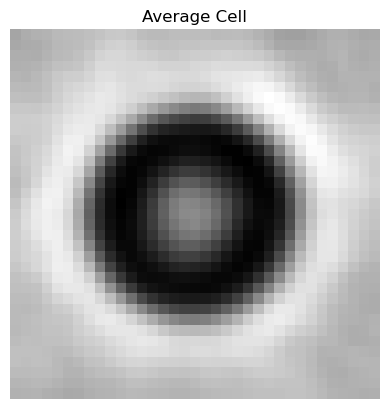

In [4]:
w = np.zeros_like(pos_patches[0]) # Initialize w with zeros based on the first positive patch shape

# Your code here

# Compute the average cell
for pos_patch in pos_patches:
    w = w + pos_patch
average_cell = w / len(pos_patches)

# Display the average cell
f, ax = plt.subplots()
ax.imshow(average_cell, cmap='gray')
ax.axis('off')
plt.title('Average Cell')
plt.show()

**Comment:**
The average cell can be computed by summing all the positive examples and dividing the resulting sum by the number of positive patches: $I_{average}=\frac{1}{N} \sum_{k=1}^{N} I_k$

### Task 1.3
Make a function that creates a covariance filter based on the set of positive examples. Place it in your `functions.py` file.

In [5]:
# def create_covariance_filter(pos_patches):
#    ...
#    return w

**Comment:**
The covariance between two images $I$ and $J$, is defined as: $Cov(I,J)=I\cdot\frac{1}{mn}(J-\mu_{J})=I\cdot w$.Therefore, to crate the covariance filter, $w$, from a set of positive patches the following steps can be followed:
1. computation of the average cell $(J)$
2. computation of the mean pixel value of average cell from the positive examples $(\mu_{J})$
3. computation of the covariance filter by dividing the difference between the mean pixel value and the average cell by the number of pixels. 

### Task 1.4
Test the filter on the positive and negative examples with  $\tau = 0$. How many misclassified examples do you get?

                 Predicted Positives  Predicted Negatives
Actual Positives      200                 0
Actual Negatives      65                  135
Misclassified Examples: 65


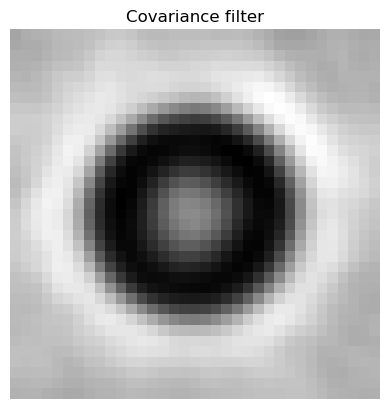

In [6]:
from functions import create_covariance_filter, classification

# Your code here

# Compute the covariance filter
w = create_covariance_filter(pos_patches)
# Display the covariance filter
f, ax = plt.subplots()
ax.imshow(w, cmap='gray')
ax.axis('off')
plt.title('Covariance filter')

# Compute the misclassified examples
tau = 0
[tp, fn, fp, tn, true_pos, false_neg, true_neg, false_pos] = classification(pos_patches, neg_patches, w, tau)
total_misclassified = fn + fp

print(f"                 Predicted Positives  Predicted Negatives")
print(f"Actual Positives      {tp:<20}{fn}")
print(f"Actual Negatives      {fp:<20}{tn}")
print(f"Misclassified Examples: {total_misclassified}")

**Comment:**
The number of misclassified examples for  $\tau = 0$ is $65$.

 ### Task 1.5
 Given a set of training images and a fixed $w$, can you suggest an efficient method to find the best $\tau$?

 **Your answer:**
The optimal threshold, $\tau$, is the one that minimizes the number of misclassified blood cells. To determine the best $\tau$, the total number of misclassified examples, both false positives and false negatives, should be evaluated in a range of threshold values. The threshold that results in the lowest misclassification count is the optimal choice.

### Task 1.6
Make a function that finds the threshold that gives the least amount of misclassified blood cells. Place it in your `functions.py` file.

In [7]:
# def compute_threshold(pos_patches, neg_patches, w):
#   ...
#   return thr

**Comment:**
To find find the threshold that gives the least amount of misclassified blood cells, the number of misclassified examples where computed for different $\tau$ values. Then, the one resulting in the lowest number of misclassified blood cells was choosen. 

### Task 1.7 
Modify `compute_threshold` such that it also computes and returns the precision and recall, as well as the confusion matrix. Also modify it in `functions.py` accordingly.

In [8]:
# def compute_threshold(pos_patches, neg_patches, w):
#   ...
#   return thr, precision, recall, conf_matrix

**Comment:**
Knowing the number of true positives (TP), false negatives (FN), false positives (FP) and true negatives (TN), the precision, the recall and the confusion matrix can be derived. Specifically:
- the precision can be computed as: $\frac{TP}{TP+FP}$;
- the recall can be computed as: $\frac{TP}{TP+FN}$;
- the precision can be derived by combining $TP$, $FN$, $FP$ and $TN$ in a matrix.

### Task 1.8
Use `compute_threshold` to compute the best threshold, the precision and the recall, as well as the confusion matrix. Explain what these numbers mean to someone who has not taken this course.

In [9]:
from functions import compute_threshold

# Your code here

# Compute the best threshold, the precision and the recall, the confusion matrix
thr, precision, recall, conf_matrix = compute_threshold(pos_patches, neg_patches, w)

print(f"The best threshold is: {thr}")
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")
print(f"The confusion matrix is:")
print(f"                 Predicted Positives  Predicted Negatives")
print(f"Actual Positives      {conf_matrix[0,0]:<20}{conf_matrix[0,1]}")
print(f"Actual Negatives      {conf_matrix[1,0]:<20}{conf_matrix[1,1]}")

The best threshold is: 0.00032202769121321157
The precision is: 0.8552631578947368
The recall is: 0.975
The confusion matrix is:
                 Predicted Positives  Predicted Negatives
Actual Positives      195                 5
Actual Negatives      33                  167


**Your answer:**
The threshold is the level based on which the classifier decides whether a patch contains a blood cell or not. When the comparison of a patch and the template, computed as the covariance, is higher than the threshold, the patch is classified as positive, meaning it contains a blood cell. Conversely, when the comparison is lower than the threshold, the patch is classified as negative, meaning it does not contain a blood cell. The best threshold, $\tau=0.000322$, is the one that ensures the lower number of misclassified examples.
Precision measures how well the classifier identifies blood-cells. It is calculated as the proportion of correctly classified blood cell images among all images that the classifier identified as blood cells. A high precision means that when the classifier predicts a blood cell, it is usually correct.
Recall measures how well the classifier detects actual blood cells. It is computed as the proportion of correctly classified blood cell images among all actual blood cell images in the dataset. A high recall means the classifier successfully identifies most blood cells, even if it occasionally makes mistakes.
The confusion matrix is a table that shows how well the classifier performed by categorizing its predictions into four groups:
1. True Positive (TP): correctly identified blood cells
2. False Negative (FN): missed blood cells
3. False Positive (FP): wrongly identified non-blood cells as blood cells
4. True Negative (TN): correctly identified non-blood cells



### Task 1.9

Study some failure cases. Can you see why your classifier fails in these cases?

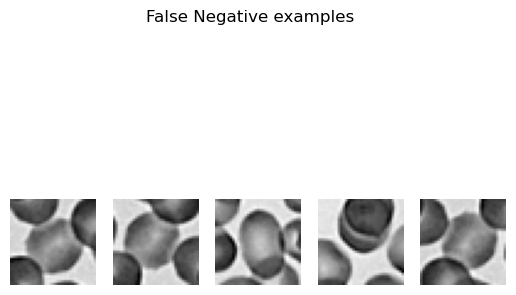

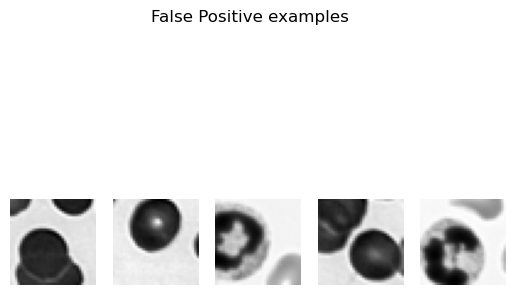

In [10]:
# Your code here

# Compute the misclassified examples
tau = thr
[tp, fn, fp, tn, true_pos, false_neg, true_neg, false_pos] = classification(pos_patches, neg_patches, w, tau)

# Select random positive and negative examples
random_false_neg = np.random.choice(false_neg,5,replace=False)
random_false_pos = np.random.choice(false_pos,5,replace=False)

# Display randomly selected false positive examples
f, ax = plt.subplots(1,5)
for i, image_idx in enumerate(random_false_neg):
    image = pos_patches[image_idx]
    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')
plt.suptitle('False Negative examples')
# Display randomly selected false negative examples    
f, ax = plt.subplots(1,5)
for i, image_idx in enumerate(random_false_pos):
    image = neg_patches[image_idx]
    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')
plt.suptitle('False Positive examples')
plt.show()

**Your answer:**
False negatives occur when when actual blood cell patches are classified as non-blood cell patches. Analyzing five false negative examples, a common pattern emerges: the patches contain a central blood cell that overlaps with neighboring cells. This overlap distorts the shape and intensity distribution. Therefore, the comparison with the average cell template results in a covariance lower than the threshold. 

False positive occur when non-blood cell patches are mistakenly classified as containing blood cells. Analyzing five false positive examples, it can be observed that patchespatches often have a high-intensity region in the center. This intensity pattern resembles the average blood cell template, even though no actual cell is present. Therefore, the comparison with the average cell template results in a covariance higher than the threshold. 

### Task 1.10

Load one of the images in the folder `data/bloodcells/test_images` using your function `read_as_grayscale` from lab 0. The image contains a
microscopic image with a lot of blood cells. In order to count the blood cells, apply your linear classiffer with a sliding dot product. Use the function `filter2D(image, -1, w)` from the package `cv2` and threshold the whole response image at once. Use the supplied `plot_overlay` to plot the results.

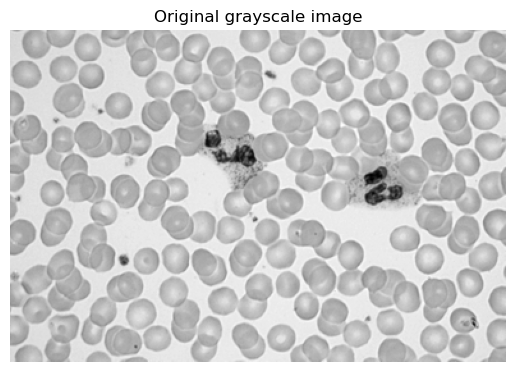

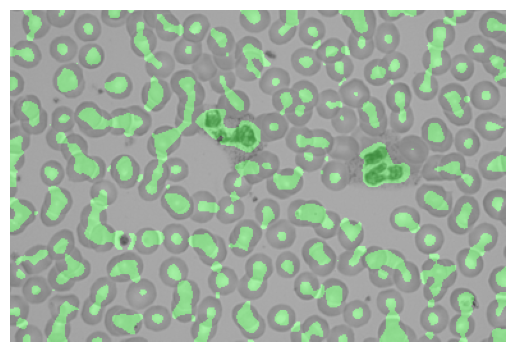

In [11]:
from functions import read_as_grayscale
from supplied import plot_overlay

# Your code here

# Load microscopic image
image = read_as_grayscale('data/bloodcells/test_images/088.png')

# Display the microscopic image
f, ax = plt.subplots()
ax.imshow(image, cmap='gray')
ax.axis('off')
plt.title('Original grayscale image')
plt.show()

# Compute the linear classification with sliding dot product
response = cv2.filter2D(image, -1, w)
tau = thr
binary_mask = response > tau

# Display the overlay of the binary mask on the original image
plot_overlay(image, binary_mask)

**Comment:**
The linear classiffer classify most of the cells of the microscopic image as positive examples. However, it also wrongly classify high-intensity regions as cells. 

### Task 1.11
You might want to change the threshold to decrease the number of false detections. Try to improve the results. What is problematic about the way that you generated the original threshold?

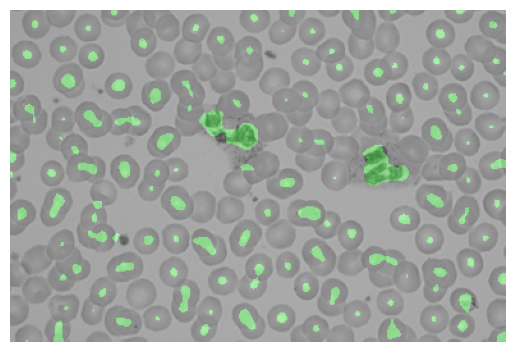

In [12]:
# Your code here

# Compute the linear classification with sliding dot product
response = cv2.filter2D(image, -1, w)
tau = thr + 0.0004
binary_mask = response > tau

# Display an overlay of the binary mask on the original image
plot_overlay(image, binary_mask)

**Your answer:**
The threshold was selected to minimize the misclassification of image patches. However, the microscopic image contains both cells and high-intensity regions that do not correspond to cells. The current threshold is not only detecting the cells but also falsely identifying these high-intensity regions as cells.
As the threshold value is increased, the number of detected cells decreases, but the high-intensity regions remain detected. This suggests that the threshold is not effectively distinguishing between the cells and the non-cell regions.

### Task 1.12 
Write a function `strict_local_maxima` that computes the coordinates of all strict local maxima in the image. Place it in your `functions.py` file.

In [13]:
# def strict_local_maxima(response, threshold):
#    ...
#    return (col_coords, row_coords)

**Comment:**
To compute the coordinates of all strict local maxima in an image, each pixel can be computed with its neighborhood. Then, one pixel is recognized as  a strict local maxima if its value is strictly greater than the second highest value in its neighborhood. 

### Task 1.13

Apply `strict_local_maxima` to the image in task 1.10. Use the supplied `plot_overlay` to plot the results.

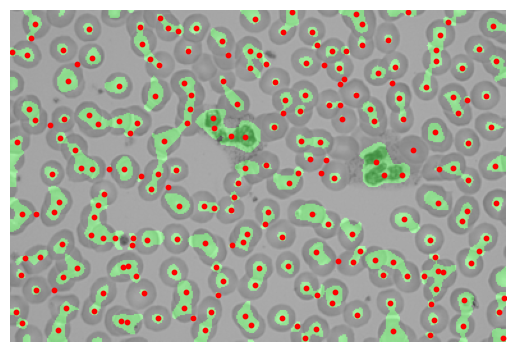

In [14]:
from functions import strict_local_maxima

# Your code here

# Compute the linear classification with sliding dot product and non-max suppression
response = cv2.filter2D(image, -1, w)
maxima_coords = strict_local_maxima(response, thr)
binary_mask = response > thr

# Display the overlay of the binary mask and the strict local maxima on the original image
plot_overlay(image, binary_mask, maxima_coords)

**Comment:**
The function detects most of the centers of the cells. However, it also detects strct local maxima which do not correspond to any cell. 

### Task 1.14
Make a function `detector` that uses your linear classifier with non-maximum suppression to detect cell centres in an image. Place it in your `functions.py` file.

In [15]:
# def detector(image, w, thr):
#     ...
#     return centers, thresholded_response

**Comment:**
The detector function was defined following these steps:
- computation of the response for images when a filter w is applied;
- computation of the thresholded response to select positive examples;
- computation of the strict local maxima, which are above the threshold, to suppress non-maximum points;
- computation of the coordinates of the strict local maxima

### Task 1.15
Test your function `detector` on the images in `data/bloodcells/test_images`. Plot the results with `plot_overlay`.

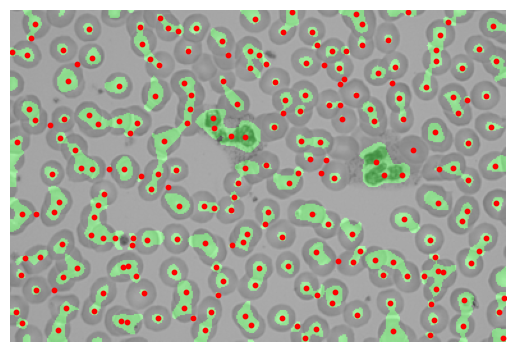

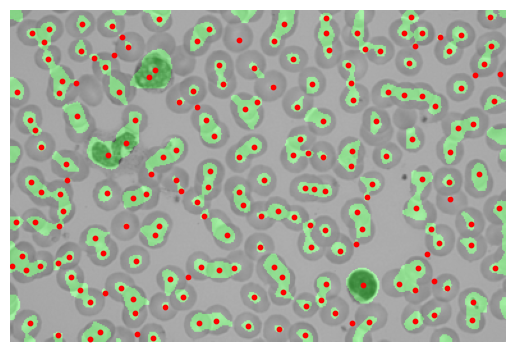

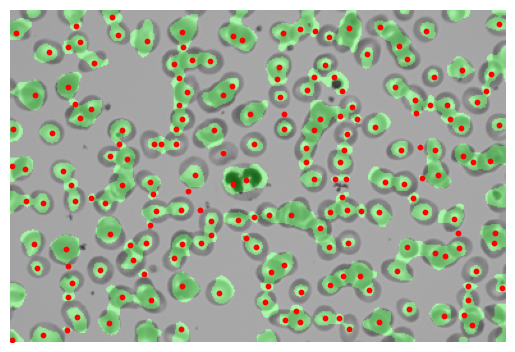

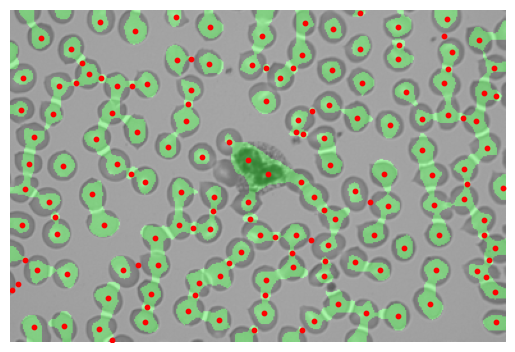

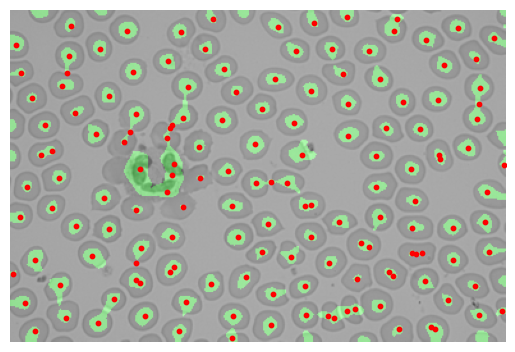

In [16]:
from functions import detector

# Load and process all test images
image_paths = glob('data/bloodcells/test_images/*.png')
for image_path in image_paths:

    # Your code here

    # Read the original image as a grayscale image
    image = read_as_grayscale(image_path)
    # Detect cell centers
    centers, thresholded_response = detector(image, w, thr)
    # Display the overlay of the binary mask and the strict local maxima on the original image
    plot_overlay(image, thresholded_response, centers)

**Comment:**
The function detects most of the centers of the cells. However, it also detects strct local maxima which do not correspond to any cell. 

## Task 2: Traffic sign classification with a mean template classifier
### Task 2.1 
Use the functions you implemented in task 1 to construct a traffic sign classifier from the training images in `data/trafficsigns/training_images`, and apply it on the test images in `data/trafficsigns/test_images`. Use your function `read_as_grayscale` from lab 0 to read the images. Display your results with `plot_overlay`.

The best threshold is: 0.0012896427296210326
The precision is: 0.905511811023622
The recall is: 0.8394160583941606
The confusion matrix is:
                 Predicted Positives  Predicted Negatives
Actual Positives      115                 22
Actual Negatives      12                  94


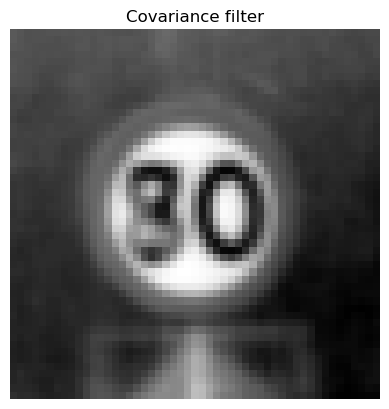

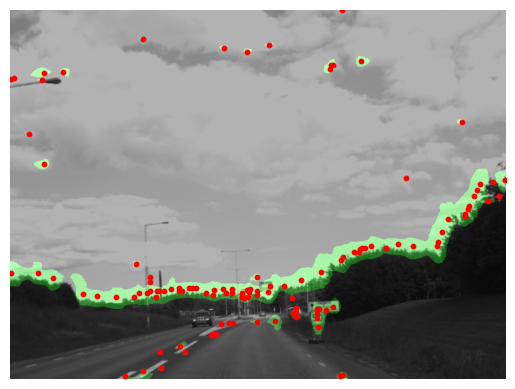

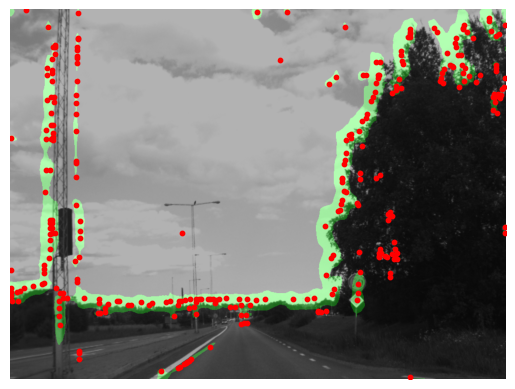

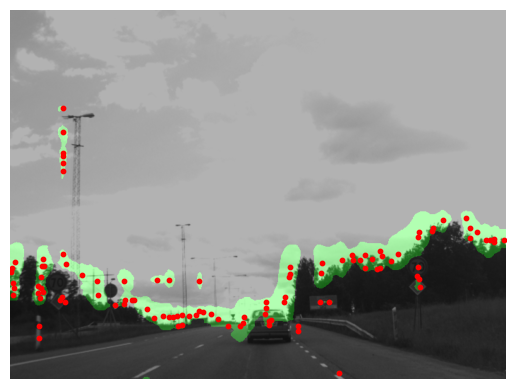

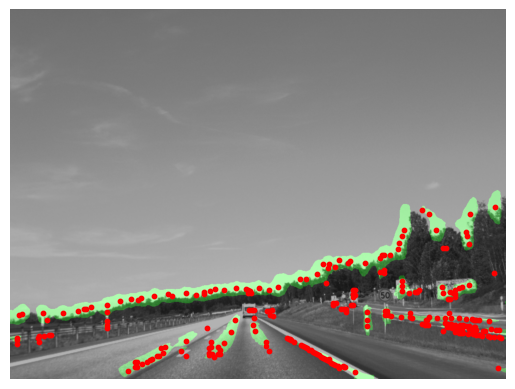

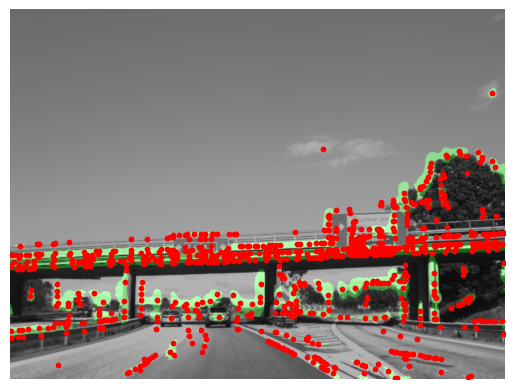

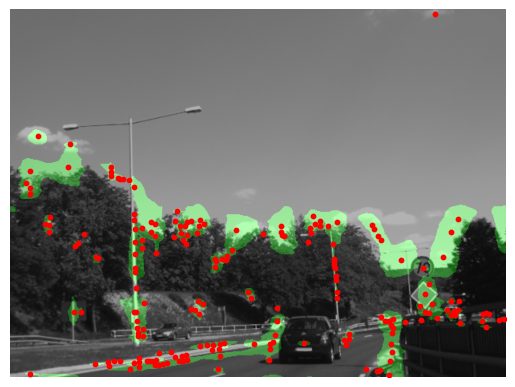

In [17]:
# Load training data
pos_patches = [read_as_grayscale(file) for file in glob('data/trafficsigns/speed/*.png')]
neg_patches = [read_as_grayscale(file) for file in glob('data/trafficsigns/bg/*.png')]

# Your code here

# Compute the covariance filter
w = create_covariance_filter(pos_patches)
# Display the covariance filter
f, ax = plt.subplots()
ax.imshow(w, cmap='gray')
ax.axis('off')
plt.title('Covariance filter')

# Classify test images
# Compute the best threshold, the precision and the recall, the confusion matrix
thr, precision, recall, conf_matrix = compute_threshold(pos_patches, neg_patches, w)
print(f"The best threshold is: {thr}")
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")
print(f"The confusion matrix is:")
print(f"                 Predicted Positives  Predicted Negatives")
print(f"Actual Positives      {conf_matrix[0,0]:<20}{conf_matrix[0,1]}")
print(f"Actual Negatives      {conf_matrix[1,0]:<20}{conf_matrix[1,1]}")
# Load test images
image_paths = glob('data/trafficsigns/test_images/*.png')
# Classify test images
for image_path in image_paths:
    # Read the original image as a grayscale image
    image = read_as_grayscale(image_path)
    # Detect centers
    centers, thresholded_response = detector(image, w, thr)
    # Display the overlay of the binary mask and the strict local maxima on the original image
    plot_overlay(image, thresholded_response, centers)

### Task 2.2 
Modify the `detector` function you implemented in task 1 such that it works for RGB images as well (use all three color channels). Use the function `read_image` from lab 0 to read the images. Display your results with `plot_overlay`. Did your results improve?

The best threshold is: 0.002255336905760923
The precision is: 0.9565217391304348
The recall is: 0.9635036496350365
The confusion matrix is:
                 Predicted Positives  Predicted Negatives
Actual Positives      132                 5
Actual Negatives      6                   100


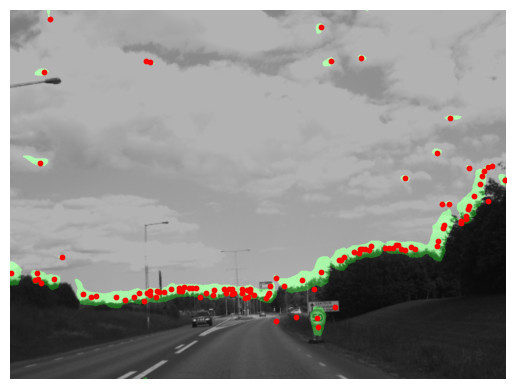

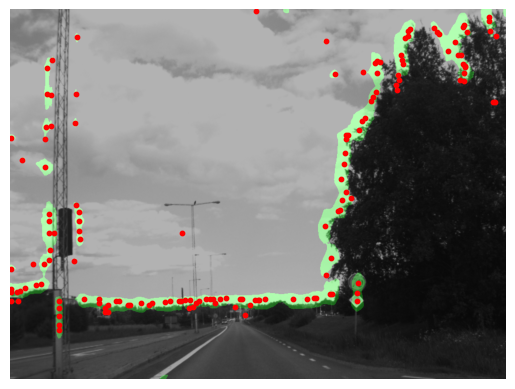

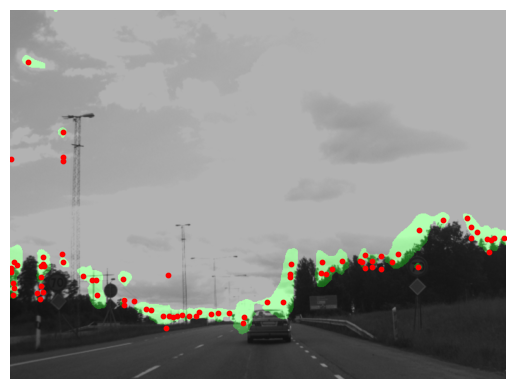

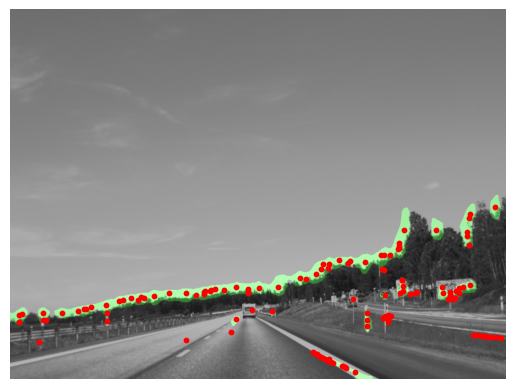

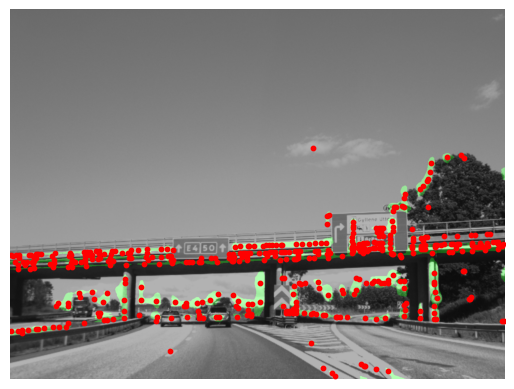

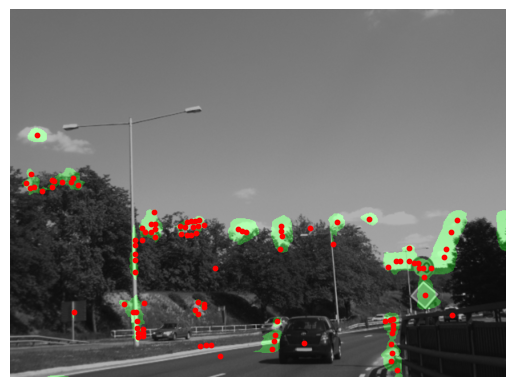

In [18]:
from functions import read_image

# Load training data
pos_patches = [read_image(file) for file in glob('data/trafficsigns/speed/*.png')]
neg_patches = [read_image(file) for file in glob('data/trafficsigns/bg/*.png')]

# Your code here

# Compute the covariance filter
w = create_covariance_filter(pos_patches)

# Classify test images
# Compute the best threshold, the precision and the recall, as well as the confusion matrix
thr, precision, recall, conf_matrix = compute_threshold(pos_patches, neg_patches, w)
print(f"The best threshold is: {thr}")
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")
print(f"The confusion matrix is:")
print(f"                 Predicted Positives  Predicted Negatives")
print(f"Actual Positives      {conf_matrix[0,0]:<20}{conf_matrix[0,1]}")
print(f"Actual Negatives      {conf_matrix[1,0]:<20}{conf_matrix[1,1]}")
# Load test images
image_paths = glob('data/trafficsigns/test_images/*.png')
# Classify test images
for image_path in image_paths:
    # Read the original image as a RGB image
    image = read_image(image_path)
    # Detect centers
    centers, thresholded_response = detector(image, w, thr)
    # Display the overlay of the binary mask and the strict local maxima on the original image
    plot_overlay(image, thresholded_response, centers)

**Comment:**
When RGB images were used instead of grayscale, the classifier's performance improved. Specifically, the precision increased from $0.9055$ to $0.9565$, and the recall rose from $0.8394$ to $0.9635$. Consistently, the total number of misclassified instances decreased from $36$ to $11$. This improvement is also evident upon visual inspection, where fewer irrelevant edges are detected.

## Task 3: Church classification with SIFT features

Use the supplied function `training_data` to extract SIFT descriptors from all training images in `data/churches/church_training/`. Use the supplied functions `extract_sift_features` and `match_descriptors` to create a function `classify_church` that tries to classify a new image by computing feature points for the new image, matching them to the features in the training data and letting each match vote for the correct church. Place it in your `functions.py` file. Try classifying all ten provided church images in `data/churches/church_test`. How many do you get right?

In [19]:
# def classify_church(image_path, training_data):
#     ...
#     return label

In [20]:
from functions import classify_church
from supplied import create_training_data


# Load training data
training_data = create_training_data('data/churches/church_training/')

# Classify test images
test_images = glob('data/churches/church_test/*.jpg')

for image_path in test_images:
    label = classify_church(image_path, training_data)
    class_name = training_data['names'][label]
    print(f'Image {os.path.basename(image_path)} classified as {class_name}')

Image gbg1.jpg classified as gbg
Image gbg2.jpg classified as gbg
Image kalmar1.jpg classified as kalmar
Image kalmar2.jpg classified as kalmar
Image lund1.jpg classified as lund
Image lund2.jpg classified as lund
Image sthlm1.jpg classified as sthlm
Image sthlm2.jpg classified as kalmar
Image uppsala1.jpg classified as uppsala
Image uppsala2.jpg classified as uppsala


**Comment:**
Only one image was not correctly classified: sthlm2.jpg classified as kalmar.

## Use of LLMs
In this laboratory, LLMs were utilized to:
- Debugging random selection: LLMs were used to troubleshoot the implementation of np.random.choice for selecting elements randomly.
- Enhancing visualization of the confusion matrix: LLMs were used to improve the display of the confusion matrix, better formatting.
- Debugging -Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3206971290691064..1.0].-